# Data Cleaning

## Imports

In [1]:
# %pip install seaborn matplotlib openpyxl

In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import SentenceTransformer

/home/hardikprakash/Projects/upskillr/.venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = os.getcwd()
path = Path(path).parent / 'data' / 'job_postings.csv'

In [4]:
dataset = pd.read_csv(path)

In [5]:
dataset.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


In [6]:
dataset.columns.to_list()

['job_id',
 'company_id',
 'title',
 'description',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'formatted_work_type',
 'location',
 'applies',
 'original_listed_time',
 'remote_allowed',
 'views',
 'job_posting_url',
 'application_url',
 'application_type',
 'expiry',
 'closed_time',
 'formatted_experience_level',
 'skills_desc',
 'listed_time',
 'posting_domain',
 'sponsored',
 'work_type',
 'currency',
 'compensation_type']

In [7]:
jobs_data = dataset[['title', 'description']]
jobs_data

,title,description
0,Licensed Insurance Agent,While many industries were hurt by the last fe...
1,Sales Manager,Are you a dynamic and creative marketing profe...
2,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...
3,Business Manager,Business ManagerFirst Baptist Church ForneyFor...
4,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...
...,...,...
15881,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2..."
15882,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...
15883,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment..."
15884,MRI Manager,Grade 105\nJob Type: Officer of Administration...


In [8]:
jobs_data['desc_len'] = jobs_data['description'].astype(str).apply(lambda x: len(x.split()))

/tmp/ipykernel_7537/3766108895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_data['desc_len'] = jobs_data['description'].astype(str).apply(lambda x: len(x.split()))


In [9]:
# Remove rows where either title or description is null
dataset = dataset.dropna(subset=['title', 'description'])
print(f"Rows after dropping nulls: {len(dataset)}")

# Check if there are any nulls left in these columns
nulls_remaining = dataset[['title', 'description']].isnull().sum()
print("Nulls remaining:")
print(nulls_remaining)

Rows after dropping nulls: 15885
Nulls remaining:
title          0
description    0
dtype: int64


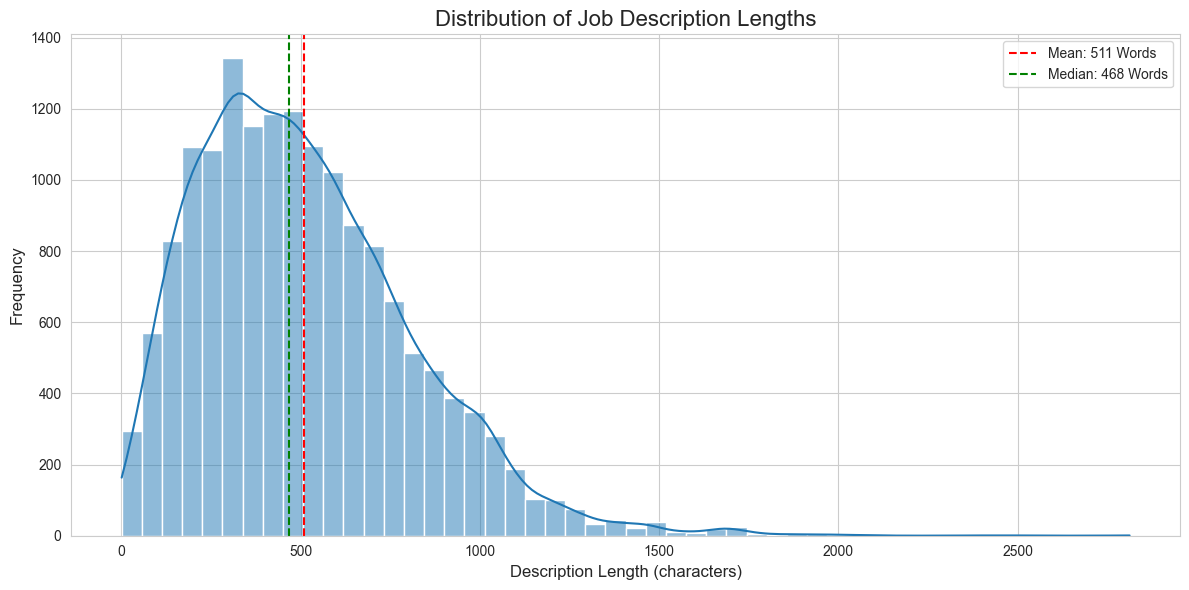

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plot
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Plot the distribution of description lengths
ax = sns.histplot(jobs_data['desc_len'], bins=50, kde=True)
ax.set_title('Distribution of Job Description Lengths', fontsize=16)
ax.set_xlabel('Description Length (characters)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add vertical line for the mean
mean_len = jobs_data['desc_len'].mean()
plt.axvline(mean_len, color='red', linestyle='--', 
            label=f'Mean: {mean_len:.0f} Words')

# Add vertical line for the median
median_len = jobs_data['desc_len'].median()
plt.axvline(median_len, color='green', linestyle='--', 
            label=f'Median: {median_len:.0f} Words')

plt.legend()
plt.tight_layout()
plt.show()